In [31]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data

In [51]:
budget = 70

In [70]:
save_dir = '../results/budget_70_alpha_tune_pen_0_pub/'

In [71]:
files_to_read = [file for file in os.listdir(save_dir) if file.startswith(f'agent_stats_budget_{budget}_')]

In [77]:
results = {}
for file in files_to_read:
    lin_ucb_params = pd.read_csv(f'{save_dir}{file}')
    results[float(file.split("_")[-1].split(".csv")[0])] = lin_ucb_params

## Plot

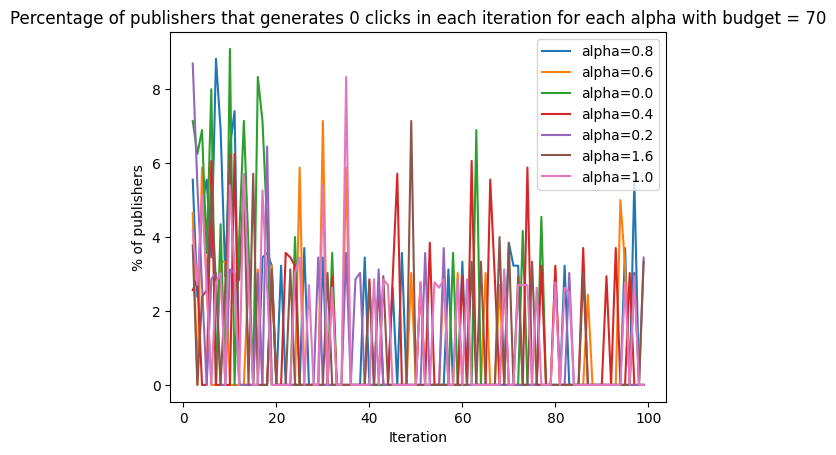

In [73]:
for alpha, lin_ucb_params in results.items():
    all_iterations = lin_ucb_params['Iteration'].unique()
    zero_clicks = lin_ucb_params[(lin_ucb_params['Iteration'] > 1) & (lin_ucb_params['num_clicks'] == 0)] \
        .groupby('Iteration').size().reset_index(name='count') \
        .set_index('Iteration').reindex(all_iterations, fill_value=0)
    total = lin_ucb_params[(lin_ucb_params['Iteration'] > 1)] \
        .groupby('Iteration').size().reset_index(name='count') \
        .set_index('Iteration').reindex(all_iterations, fill_value=0)
    perc_zero_clicks = (zero_clicks['count'] / total['count']) * 100
    perc_zero_clicks = perc_zero_clicks.sort_index()
    perc_zero_clicks.plot(label=f'alpha={alpha}')
    plt.title(f"Percentage of publishers that generates 0 clicks in each iteration for each alpha with budget = {budget}")
    plt.xlabel('Iteration')
    plt.ylabel('% of publishers')
    plt.legend()

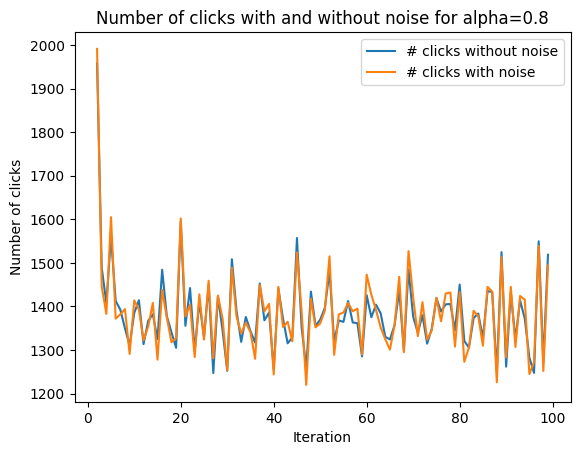

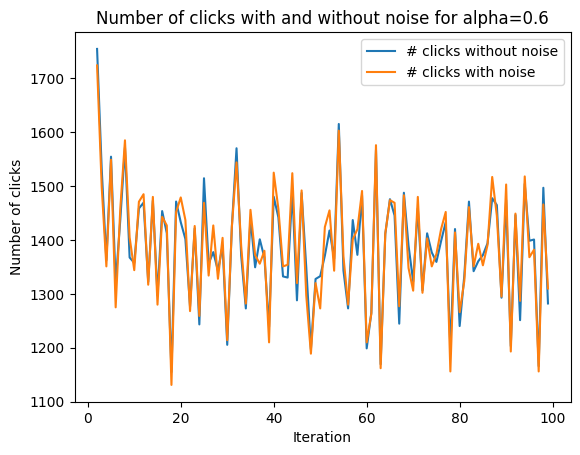

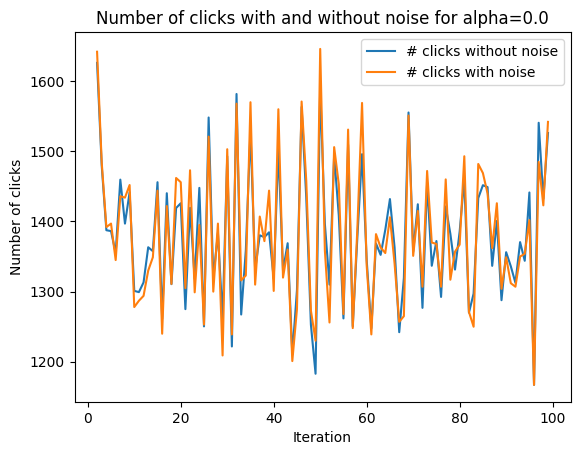

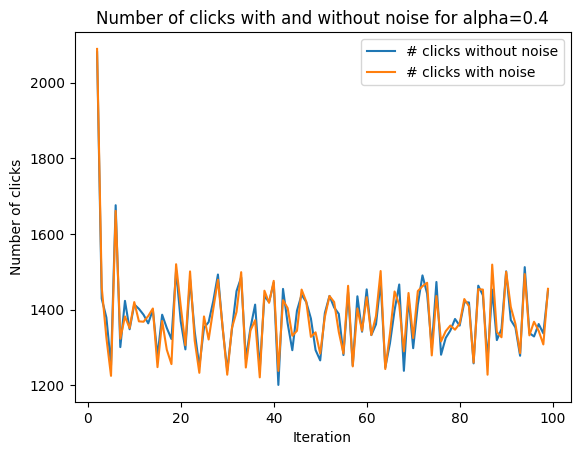

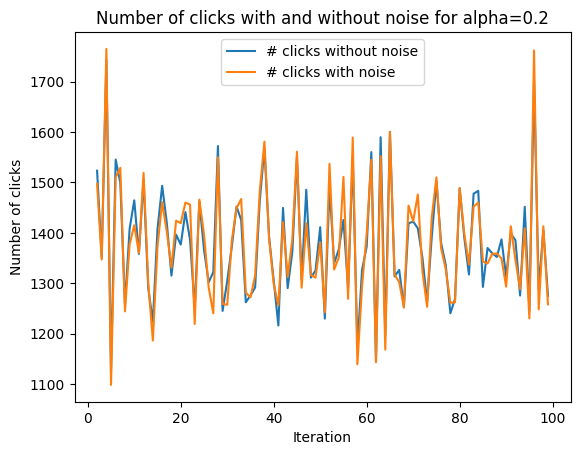

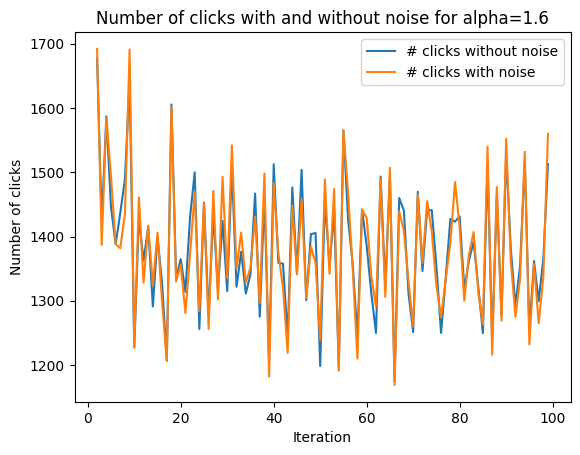

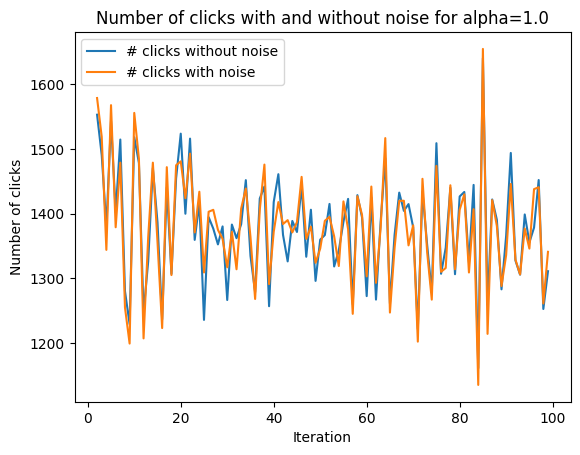

In [79]:
# Plot number of clicks without noise for each alpha with a separate plot
grouped_results = {}
for alpha, lin_ucb_params in results.items():
    grouped_results[alpha] = lin_ucb_params[lin_ucb_params['Iteration']>1].groupby('Iteration').agg({'num_clicks': 'sum', 'num_clicks_no_noise': 'sum'})
for alpha, a_g_res in grouped_results.items():
    plt.title(f'Number of clicks with and without noise for alpha={alpha}')
    plt.plot(a_g_res.index.to_numpy(), a_g_res['num_clicks_no_noise'].to_numpy(), label=f'# clicks without noise')
    plt.plot(a_g_res.index.to_numpy(), a_g_res['num_clicks'].to_numpy(), label=f'# clicks with noise')
    plt.xlabel('Iteration')
    plt.ylabel('Number of clicks')
    plt.legend()
    plt.show()

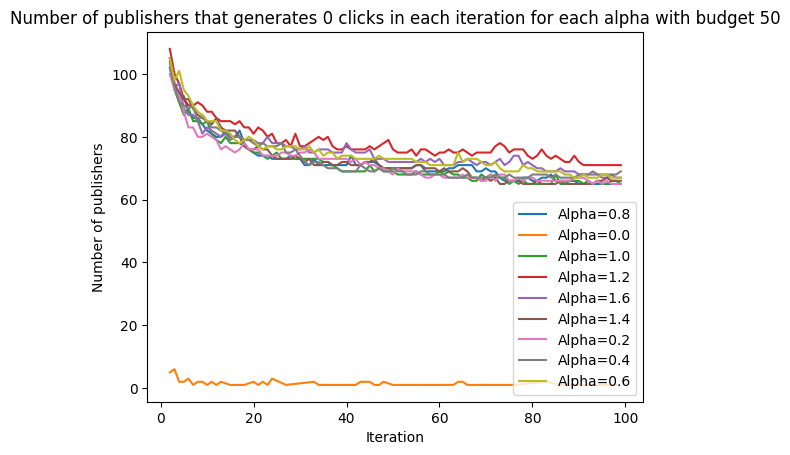

In [17]:
for alpha, lin_ucb_params in results.items():
    lin_ucb_params[(lin_ucb_params['Iteration'] > 1) & (lin_ucb_params['num_clicks'] == 0)].groupby('Iteration').size().plot(label=f'Alpha={alpha}')
    plt.title(f"Number of publishers that generates 0 clicks in each iteration for each alpha with budget {budget}")
    plt.xlabel('Iteration')
    plt.ylabel('Number of publishers')
    plt.legend()

In [27]:
def plot_perc_zero_pub(budget, save_dir):
    files_to_read = [file for file in os.listdir(save_dir) if file.startswith(f'agent_stats_budget_{budget}_')]
    results = {}
    for file in files_to_read:
        lin_ucb_params = pd.read_csv(f'{save_dir}{file}')
        results[float(file.split("_")[-1].split(".csv")[0])] = lin_ucb_params
    for alpha, lin_ucb_params in results.items():
        all_iterations = lin_ucb_params['Iteration'].unique()
        zero_clicks = lin_ucb_params[(lin_ucb_params['Iteration'] > 1) & (lin_ucb_params['num_clicks'] == 0)] \
            .groupby('Iteration').size().reset_index(name='count') \
            .set_index('Iteration').reindex(all_iterations, fill_value=0)
        total = lin_ucb_params[(lin_ucb_params['Iteration'] > 1)] \
            .groupby('Iteration').size().reset_index(name='count') \
            .set_index('Iteration').reindex(all_iterations, fill_value=0)
        perc_zero_clicks = (zero_clicks['count'] / total['count']) * 100
        perc_zero_clicks = perc_zero_clicks.sort_index()
        perc_zero_clicks.plot(label=f'alpha={alpha}')
        plt.title(f"Percentage of publishers that generates 0 clicks in each\n iteration for each alpha with budget = {budget}")
        plt.xlabel('Iteration')
        plt.ylabel('% of publishers')
        plt.legend()
        plt.tight_layout()
    plt.savefig(f'{save_dir}perc_zero_pub_budget_{budget}.png')
    plt.close()

In [29]:
for budget in [50, 70, 100, 130, 150]:
    plot_perc_zero_pub(budget, save_dir)

In [40]:
np.exp(-0.1*200)

2.061153622438558e-09

In [42]:
prova = results[1]
prova = prova[(prova['Iteration'] > 1)]

In [45]:
prova.groupby('Iteration').agg({'spent': 'sum', 'p': 'sum', 'num_clicks': 'sum'})

,spent,p,num_clicks
Iteration,,,
2,72.916984,690.522248,1382.0
3,65.525456,700.959951,1317.0
4,55.043635,688.614260,1098.0
5,52.784560,741.229796,1074.0
6,57.739566,792.895013,1159.0
...,...,...,...
95,52.423672,992.493768,1013.0
96,44.774241,958.324774,852.0
97,54.633031,1031.831997,1066.0


In [48]:
prova[prova['num_clicks'] != 0].groupby('Iteration').agg({'spent': 'sum', 'p': 'sum'})

,spent,p
Iteration,,
2,72.816327,629.338716
3,65.525456,656.087973
4,55.043635,640.321972
5,52.784560,710.544074
6,57.739566,759.130971
...,...,...
95,52.423672,985.954109
96,44.774241,951.817965
97,54.633031,1018.922446


In [59]:
prova[prova['num_clicks'] != 0].groupby('Iteration').agg({'p': 'mean'})

,p
Iteration,
2,13.390185
3,17.265473
4,20.655547
5,22.204502
6,24.488096
...,...
95,46.950196
96,47.590898
97,42.455102


In [60]:
prova[prova['num_clicks'] == 0].groupby('Iteration').agg({'p': 'mean', 'spent': 'mean'})

,p,spent
Iteration,,
2,0.588303,0.000968
3,0.472337,0.000000
4,0.530684,0.000000
5,0.352709,0.000000
6,0.379371,0.000000
...,...,...
95,0.100610,0.000000
96,0.100105,0.000000
97,0.195599,0.000000


In [57]:
prova[prova['num_clicks'] == 0].groupby('Iteration').agg({'spent': 'sum', 'p': 'sum', 'publisher': 'size'})

,spent,p,publisher
Iteration,,,
2,0.100657,61.183532,104
3,0.000000,44.871978,95
4,0.000000,48.292288,91
5,0.000000,30.685722,87
6,0.000000,33.764042,89
...,...,...,...
95,0.000000,6.539659,65
96,0.000000,6.506809,65
97,0.000000,12.909551,66


In [49]:
prova[prova['num_clicks'] == 0]

,publisher,won_auctions,lost_auctions,win_rate,num_clicks,ctr,true_ctr,spent,mean_bid,cpc,cpm,Agent,Iteration,exp_rew,p,num_clicks_no_noise
108,accordiespartiti.it,0,297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Nostro 1,2,0.000000,0.433826,0.0
109,accordiespartiti.it,0,275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Nostro 1,3,0.000000,0.397988,0.0
110,accordiespartiti.it,0,294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Nostro 1,4,0.000000,0.369778,0.0
111,accordiespartiti.it,0,287,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Nostro 1,5,0.000000,0.346826,0.0
112,accordiespartiti.it,0,257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Nostro 1,6,0.000000,0.327678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9647,vogue.es,0,286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Nostro 1,97,0.000000,0.099664,0.0
9648,vogue.es,0,279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Nostro 1,98,0.000000,0.099173,0.0
9649,vogue.es,0,280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Nostro 1,99,0.000000,0.098689,0.0
9850,www-hola-com.cdn.ampproject.org,0,288,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Nostro 1,2,2.194393,2.576875,0.0


In [63]:
prova['new_spent'] = prova.apply(lambda x: np.exp(-0.1 * x['p']) if x['spent'] == 0 else x['spent'], axis=1)

/var/folders/pt/p9_0myf16lx1rjjrf63vkx5w0000gp/T/ipykernel_92178/319234781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prova['new_spent'] = prova.apply(lambda x: np.exp(-0.1 * x['p']) if x['spent'] == 0 else x['spent'], axis=1)
